In [2]:
##importing a few general use case libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/Users/saptarshipal/Documents/data/pred_maint/data/ai4i2020.csv')
data = df.copy()


In [4]:

#Changing the column name

data.rename(columns = {'Air temperature [K]':'Air temperature','Process temperature [K]':'Process temperature','Rotational speed [rpm]':'Rotational speed','Torque [Nm]':'Torque','Tool wear [min]':'Tool wear'},inplace = True)

#Dropping irrelevant Categorical column

data.drop(columns = ['UDI','Product ID','TWF', 'HDF', 'PWF', 'OSF','RNF'], axis = 1,inplace =True)

In [5]:
#Encoding the categorical data

data['Type'] = data['Type'].map({'L':0,'M':1,'H':2})

In [6]:
def data_imputer(data):

    imputer = SimpleImputer()

    cols = ['Type', 'Air temperature', 'Process temperature', 'Rotational speed',
        'Torque', 'Tool wear']

    for col in cols:
        data[cols] = imputer.fit_transform(data[cols])

    return data

In [7]:
data_imputer(data)

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure
0,1.0,298.1,308.6,1551.0,42.8,0.0,0
1,0.0,298.2,308.7,1408.0,46.3,3.0,0
2,0.0,298.1,308.5,1498.0,49.4,5.0,0
3,0.0,298.2,308.6,1433.0,39.5,7.0,0
4,0.0,298.2,308.7,1408.0,40.0,9.0,0
...,...,...,...,...,...,...,...
9995,1.0,298.8,308.4,1604.0,29.5,14.0,0
9996,2.0,298.9,308.4,1632.0,31.8,17.0,0
9997,1.0,299.0,308.6,1645.0,33.4,22.0,0
9998,2.0,299.0,308.7,1408.0,48.5,25.0,0


# Splitting the dataset

In [8]:
X = data.drop(columns = ['Machine failure'], axis =1)
y = data['Machine failure'] 

In [9]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Type,10000.0,0.50030,0.671301,0.0,0.0,0.0,1.0,2.0
Air temperature,10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature,10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed,10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque,10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear,10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0


In [10]:
#Split the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2,random_state= 67 )

y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)


In [11]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(8000, 6) (2000, 6) (8000, 1) (2000, 1)


In [12]:
X_train.describe()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
count,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000
mean,0.504375,300.009887,310.005525,1537.31625,40.045625,107.866125
std,0.674379,2.005015,1.489165,175.97809,9.916052,63.414911
min,0.000000,295.300000,305.700000,1168.00000,3.800000,0.000000
25%,0.000000,298.300000,308.800000,1423.00000,33.300000,53.000000
50%,0.000000,300.100000,310.100000,1504.00000,40.000000,108.000000
75%,1.000000,301.500000,311.100000,1611.00000,46.700000,162.000000
max,2.000000,304.500000,313.800000,2886.00000,76.200000,251.000000


In [13]:
#Created variables to keep reference points for future data point scaling

X_train_Air_temperature_mean = X_train.iloc[:,1].mean()
X_train_Process_temperature_mean = X_train.iloc[:,2].mean()
X_train_Rotational_speed_mean = X_train.iloc[:,3].mean()
X_train_Torque_mean = X_train.iloc[:,4].mean()

X_train_Air_temperature_max = X_train.iloc[:,1].max()
X_train_Process_temperature_max = X_train.iloc[:,2].max()
X_train_Rotational_speed_max = X_train.iloc[:,3].max()
X_train_Torque_max = X_train.iloc[:,4].max()

X_train_Air_temperature_min = X_train.iloc[:,1].min()
X_train_Process_temperature_min = X_train.iloc[:,2].min()
X_train_Rotational_speed_min = X_train.iloc[:,3].min()
X_train_Torque_min = X_train.iloc[:,4].min()

In [14]:
X_test.describe()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.484000,299.985100,310.005700,1544.615500,39.752050,108.290500
std,0.658757,1.981492,1.462179,191.874906,10.176845,64.617156
min,0.000000,295.400000,305.800000,1200.000000,4.600000,0.000000
25%,0.000000,298.300000,308.800000,1422.000000,32.600000,53.000000
50%,0.000000,300.100000,310.100000,1501.000000,40.200000,107.000000
75%,1.000000,301.500000,311.100000,1617.250000,46.900000,165.000000
max,2.000000,304.400000,313.700000,2861.000000,76.600000,253.000000


# Preprocessing the Data

In [15]:
# Scaling of X_train numeric data

X_train_trans = X_train.copy()

trans = MinMaxScaler()

X_train_trans[['Air temperature', 'Process temperature', 'Rotational speed','Torque', 'Tool wear']] = trans.fit_transform(X_train_trans[['Air temperature', 'Process temperature', 'Rotational speed','Torque', 'Tool wear']])

X_train_trans

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
963,0.0,0.054348,0.111111,0.263679,0.383978,0.378486
1830,0.0,0.271739,0.197531,0.402212,0.279006,0.709163
4112,2.0,0.717391,0.592593,0.176950,0.495856,0.745020
3189,0.0,0.521739,0.419753,0.222934,0.412983,0.852590
4897,2.0,0.923913,0.839506,0.207800,0.472376,0.832669
...,...,...,...,...,...,...
1571,0.0,0.326087,0.333333,0.209546,0.462707,0.637450
859,2.0,0.097826,0.160494,0.217695,0.508287,0.111554
7621,0.0,0.565217,0.716049,0.187427,0.477901,0.266932
1738,2.0,0.336957,0.271605,0.454016,0.243094,0.541833


In [16]:
# Scaling of X_test numeric data

X_test_trans = X_test.copy()

trans = MinMaxScaler()

X_test_trans[['Air temperature', 'Process temperature', 'Rotational speed','Torque', 'Tool wear']] = trans.fit_transform(X_test_trans[['Air temperature', 'Process temperature', 'Rotational speed','Torque', 'Tool wear']])

X_test_trans

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
1348,0.0,0.366667,0.556962,0.098134,0.568056,0.110672
4774,0.0,0.911111,0.784810,0.377483,0.259722,0.407115
5562,0.0,0.766667,0.746835,0.269717,0.381944,0.778656
1380,0.0,0.366667,0.544304,0.352800,0.320833,0.450593
1361,1.0,0.355556,0.544304,0.155328,0.518056,0.241107
...,...,...,...,...,...,...
6560,0.0,0.688889,0.632911,0.458158,0.238889,0.584980
1091,0.0,0.177778,0.240506,0.148706,0.580556,0.031621
6892,0.0,0.622222,0.734177,0.144491,0.537500,0.517787
6038,0.0,0.588889,0.658228,0.178206,0.468056,0.391304


# Modelling

In [17]:
#LogisticClassifier
lr = LogisticRegression()
lr.fit(X_train_trans, y_train)
lr_pred = lr.predict(X_test_trans)
print(classification_report(y_test,lr_pred))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1925
           1       1.00      0.03      0.05        75

    accuracy                           0.96      2000
   macro avg       0.98      0.51      0.52      2000
weighted avg       0.96      0.96      0.95      2000



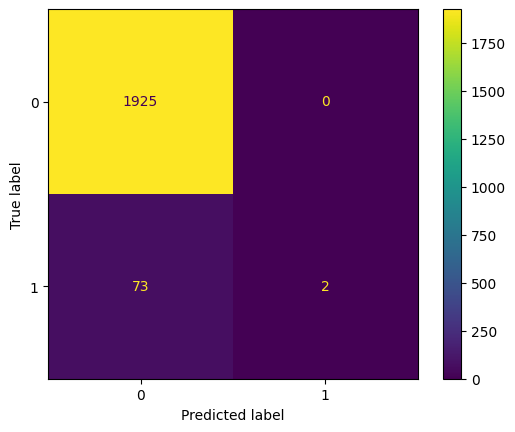

In [18]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,lr_pred))
disp.plot()
plt.show()

In [19]:
#Support Vector Classifier
svc = SVC()
svc.fit(X_train_trans, y_train)
svc_pred = svc.predict(X_test_trans)
print(classification_report(y_test,svc_pred))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1925
           1       1.00      0.03      0.05        75

    accuracy                           0.96      2000
   macro avg       0.98      0.51      0.52      2000
weighted avg       0.96      0.96      0.95      2000



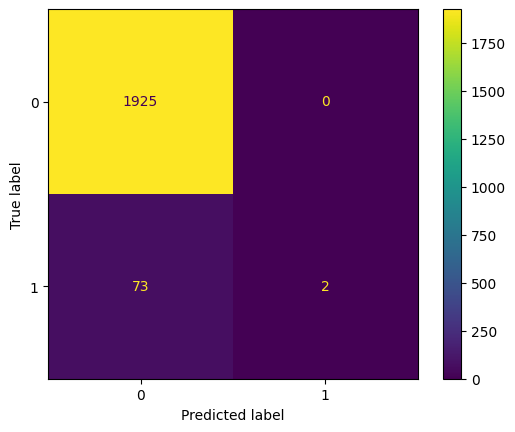

In [20]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,svc_pred))
disp.plot()
plt.show()

In [21]:
#NeuralNetwork
nn = MLPClassifier(hidden_layer_sizes=(128, 128))
nn.fit(X_train_trans, y_train)
nn_pred = nn.predict(X_test_trans)
print(classification_report(y_test,nn_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1925
           1       0.88      0.56      0.68        75

    accuracy                           0.98      2000
   macro avg       0.93      0.78      0.84      2000
weighted avg       0.98      0.98      0.98      2000



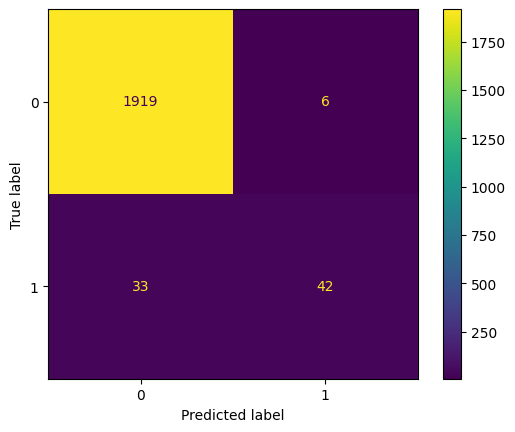

In [22]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,nn_pred))
disp.plot()
plt.show()

In [23]:
##Knn classifier
knn= KNeighborsClassifier()
knn.fit(X_train_trans,y_train)
knn_pred = knn.predict(X_test_trans) 

print(classification_report(y_test,knn_pred))



              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1925
           1       0.72      0.28      0.40        75

    accuracy                           0.97      2000
   macro avg       0.85      0.64      0.69      2000
weighted avg       0.96      0.97      0.96      2000



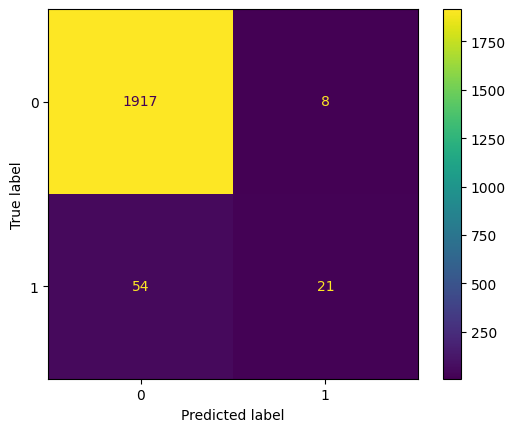

In [24]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,knn_pred))
disp.plot()
plt.show()

In [25]:
#Decision tree classifier

dt= DecisionTreeClassifier()
dt.fit(X_train_trans,y_train)
dt_pred = dt.predict(X_test_trans) 
print(classification_report(y_test,dt_pred))


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1925
           1       0.61      0.68      0.64        75

    accuracy                           0.97      2000
   macro avg       0.80      0.83      0.81      2000
weighted avg       0.97      0.97      0.97      2000



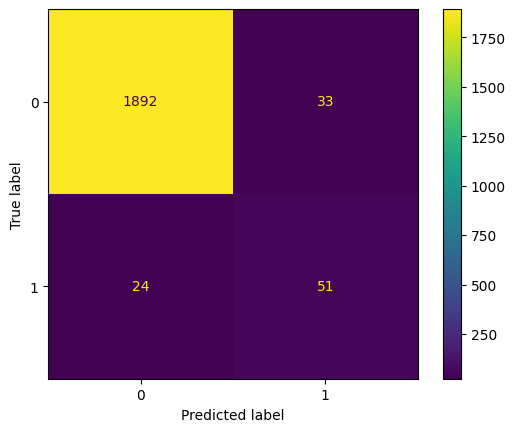

In [26]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,dt_pred))
disp.plot()
plt.show()

In [27]:
#Random forest classifier
rfc= RandomForestClassifier(random_state=42)
rfc.fit(X_train_trans,y_train)
rfc_pred = rfc.predict(X_test_trans) 
print(classification_report(y_test,rfc_pred))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1925
           1       0.76      0.60      0.67        75

    accuracy                           0.98      2000
   macro avg       0.87      0.80      0.83      2000
weighted avg       0.98      0.98      0.98      2000



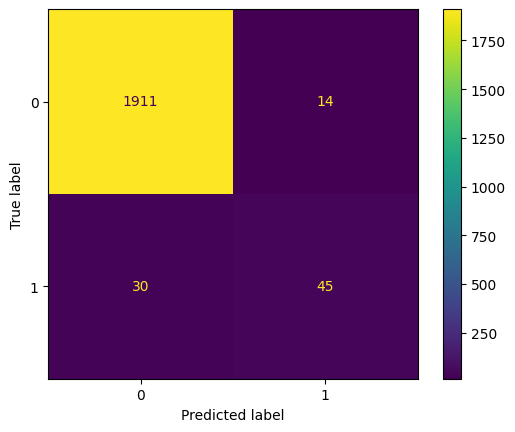

In [28]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,rfc_pred))
disp.plot()
plt.show()

# Model Comparison

In [29]:
Model_comparer = pd.DataFrame({'Model':['Logistic classifier',
                                        'Support Vector classifier',
                                        'Neural Network classifier',
                                        'KNN classifier',
                                        'Decision Tree classifier',
                                        'Random forest classifier'],
                                'Model_short_form':['lr',
                                'svc',
                                'nn',
                                'knn',
                                'dt',
                                'rfc'],        
                                'Accuracy':[classification_report(y_test,lr_pred)[203:207],
                                classification_report(y_test,svc_pred)[203:207],
                                classification_report(y_test,nn_pred)[203:207],
                                classification_report(y_test,knn_pred)[203:207],
                                classification_report(y_test,dt_pred)[203:207],
                                classification_report(y_test,rfc_pred)[203:207]],
                                'True_Positive': [confusion_matrix(y_test,lr_pred)[0,0],
                                confusion_matrix(y_test,svc_pred)[0,0],
                                confusion_matrix(y_test,nn_pred)[0,0],
                                confusion_matrix(y_test,knn_pred)[0,0],
                                confusion_matrix(y_test,dt_pred)[0,0],
                                confusion_matrix(y_test,rfc_pred)[0,0]
                                ,],
                                'True_Negative': [confusion_matrix(y_test,lr_pred)[1,1],
                                confusion_matrix(y_test,svc_pred)[1,1],
                                confusion_matrix(y_test,nn_pred)[1,1],
                                confusion_matrix(y_test,knn_pred)[1,1],
                                confusion_matrix(y_test,dt_pred)[1,1],
                                confusion_matrix(y_test,rfc_pred)[1,1]]})

Model_comparer.sort_values(by = ['Accuracy','True_Positive','True_Negative'],ascending = [False,False,False])

,Model,Model_short_form,Accuracy,True_Positive,True_Negative
2,Neural Network classifier,nn,0.98,1919,42
5,Random forest classifier,rfc,0.98,1911,45
3,KNN classifier,knn,0.97,1917,21
4,Decision Tree classifier,dt,0.97,1892,51
0,Logistic classifier,lr,0.96,1925,2
1,Support Vector classifier,svc,0.96,1925,2


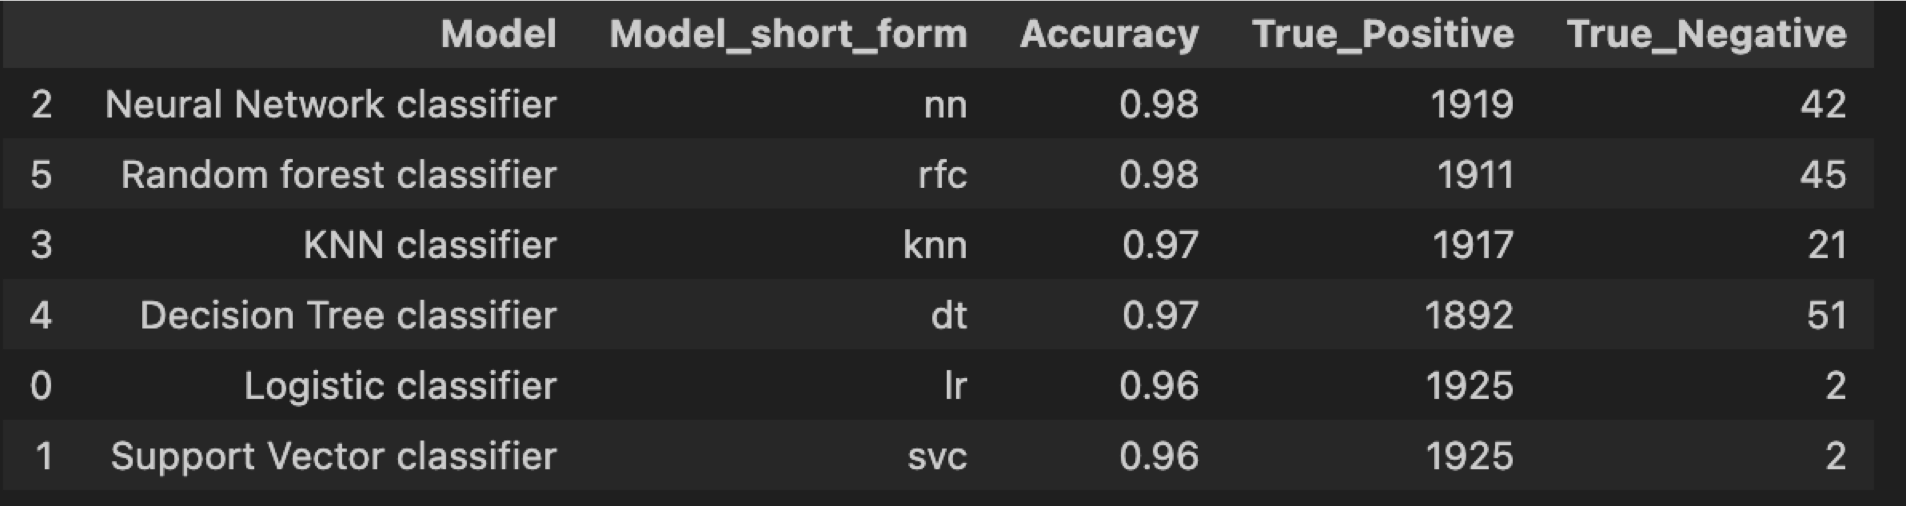

In [30]:
Best_model = Model_comparer.sort_values(by = ['Accuracy','True_Positive','True_Negative'],ascending = [False,False,False]).iloc[0,0]

In [32]:
print('The best model is ' + str(Best_model) + '.')

The best model is Neural Network classifier.


In [33]:
Best_model_predictor = str(Model_comparer.sort_values(by = ['Accuracy','True_Positive','True_Negative'],ascending = [False,False,False]).iloc[0,1]) + str('_pred')
Best_model_predictor

'nn_pred'

In [34]:
#Cross checking predictions for best model.

print('The model is ' + str(Best_model) + '.\n')
cross_checking=pd.DataFrame({'Actual':y_test.values.tolist(),'Predicted':nn_pred})
cross_checking.sample(20).style.background_gradient(cmap='coolwarm')

The model is Neural Network classifier.



,Actual,Predicted
755,[0],0
1924,[0],0
1480,[0],0
847,[0],0
308,[0],0
58,[0],0
621,[0],0
855,[0],0
490,[0],0
1257,[0],0


# Cross Validation for Hyperparameter Tuning of the best model

In [35]:
cv_model = nn

In [36]:

print(cross_val_score(cv_model, X_train_trans, y_train, cv=2))
print(np.mean(cross_val_score(cv_model, X_train_trans, y_train, cv=2)))

[0.9765  0.97175]
0.975125


In [37]:
print(cross_val_score(cv_model, X_train_trans, y_train, cv=5))
print(np.mean(cross_val_score(cv_model, X_train_trans, y_train, cv=5)))

[0.9825   0.979375 0.981875 0.9725   0.97125 ]
0.977625


In [39]:
cv_comparison = pd.DataFrame({'cv': [2,3,4,5,6,7,8,9,10],'mean_cross_val_score': [np.mean(cross_val_score(cv_model, X_train_trans, y_train, cv=2))
                                                                                 ,np.mean(cross_val_score(cv_model, X_train_trans, y_train, cv=3))
                                                                                 ,np.mean(cross_val_score(cv_model, X_train_trans, y_train, cv=4))
                                                                                 ,np.mean(cross_val_score(cv_model, X_train_trans, y_train, cv=5))
                                                                                 ,np.mean(cross_val_score(cv_model, X_train_trans, y_train, cv=6))
                                                                                 ,np.mean(cross_val_score(cv_model, X_train_trans, y_train, cv=7))
                                                                                 ,np.mean(cross_val_score(cv_model, X_train_trans, y_train, cv=8))
                                                                                 ,np.mean(cross_val_score(cv_model, X_train_trans, y_train, cv=9))
                                                                                 ,np.mean(cross_val_score(cv_model, X_train_trans, y_train, cv=10))]})
cv_comparison.sort_values(by = ['mean_cross_val_score'],ascending =False)

,cv,mean_cross_val_score
3,5,0.978500
5,7,0.977999
1,3,0.977749
4,6,0.977749
6,8,0.977125
8,10,0.975375
7,9,0.975375
0,2,0.974000
2,4,0.973750


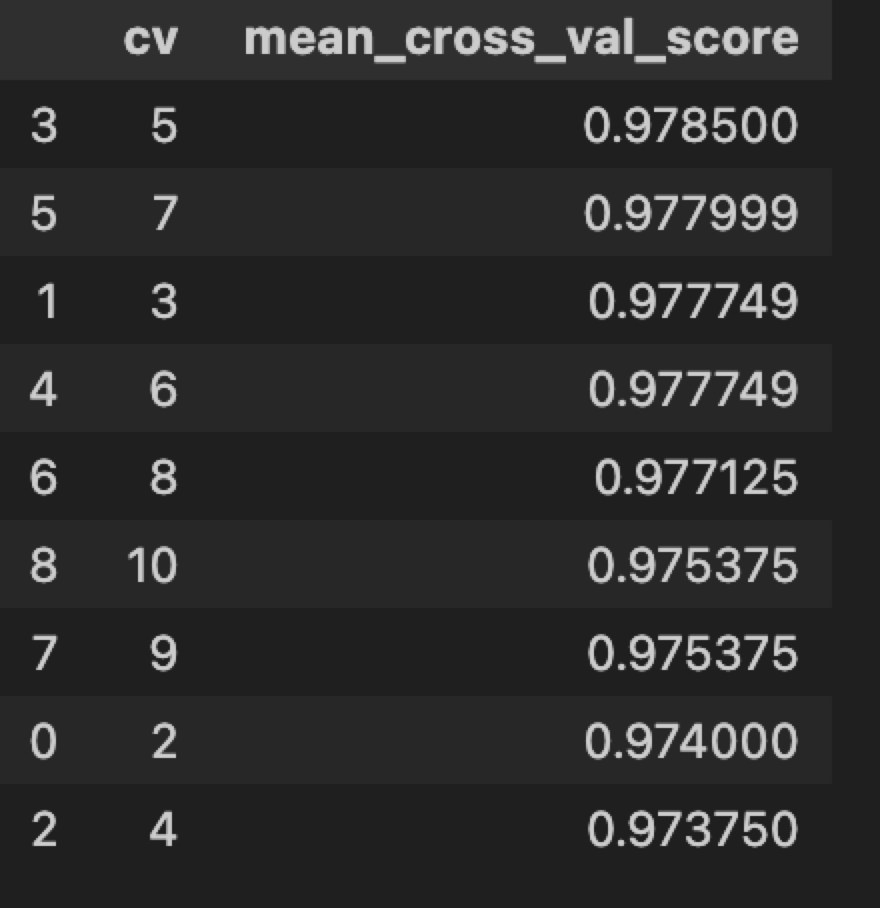

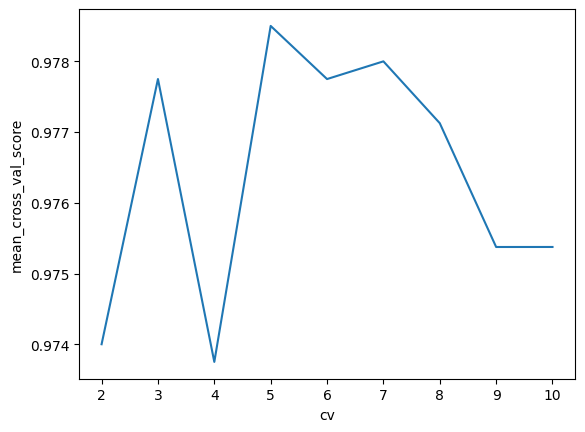

In [40]:
sns.lineplot(x=cv_comparison['cv'],y=cv_comparison['mean_cross_val_score'])
plt.show()

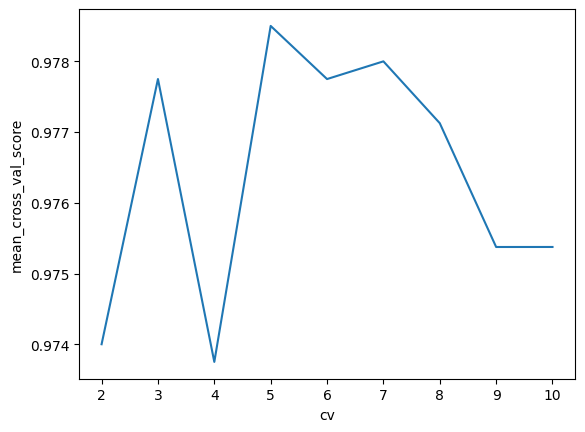

In [45]:
print('The max mean cross validation is ' + str(cv_comparison.sort_values(by = ['mean_cross_val_score'],ascending =False).iloc[0,1]) + 'found at cv ='+str(cv_comparison.sort_values(by = ['mean_cross_val_score'],ascending =False).iloc[0,0]) + '.')

The max mean cross validation is 0.9785found at cv =5.


# Hyperparameter tuning (code has been commented out to save time)

In [47]:

# param_grid = { 
#     'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive'],

# }

# CV_model = GridSearchCV(estimator=cv_model, param_grid=param_grid, cv= cv_comparison.sort_values(by = ['mean_cross_val_score'],ascending =False).iloc[0,0])
# CV_model.fit(X_train_trans, y_train)
     
# CV_model.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (50, 100, 50),
 'learning_rate': 'constant',
 'solver': 'adam'}

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (50, 100, 50),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [48]:
print("The best parameters for the final model are "+str(CV_model.best_params_))

The best parameters for the final model are {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}


{'criterion': 'gini', 'max_depth': 9, 'max_features': 6, 'n_estimators': 128}

# Running the best model with Hypertuned parameters.

In [51]:
final_model=MLPClassifier(activation= 'relu',
 alpha= 0.0001,
 hidden_layer_sizes= (50, 100, 50),
 learning_rate= 'constant',
 solver= 'adam')
final_model.fit(X_train_trans, y_train)
final_model_pred=final_model.predict(X_test_trans)
print(classification_report(y_test,final_model_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1925
           1       0.85      0.44      0.58        75

    accuracy                           0.98      2000
   macro avg       0.91      0.72      0.78      2000
weighted avg       0.97      0.98      0.97      2000



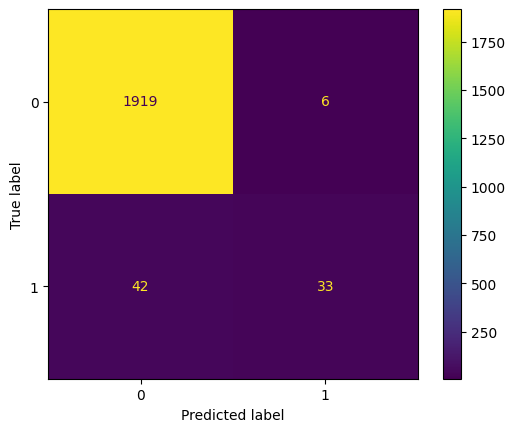

In [52]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,final_model_pred))
disp.plot()
plt.show()    

# Comparing model from before vs. with Hypertuned parameters

In [54]:
Hyp_model_compare = pd.DataFrame({'Model':['Best_model','final_model'],
                                    'Accuracy':[Model_comparer.sort_values(by = ['Accuracy','True_Positive','True_Negative'],ascending = [False,False,False]).iloc[0,2],classification_report(y_test,final_model_pred)[203:207]],
                                    'True_Positive':[Model_comparer.sort_values(by = ['Accuracy','True_Positive','True_Negative'],ascending = [False,False,False]).iloc[0,3],confusion_matrix(y_test,final_model_pred)[0,0]],
                                    'True_Negative':[Model_comparer.sort_values(by = ['Accuracy','True_Positive','True_Negative'],ascending = [False,False,False]).iloc[0,4],confusion_matrix(y_test,final_model_pred)[1,1]]})
Hyp_model_compare                                  

,Model,Accuracy,True_Positive,True_Negative
0,Best_model,0.98,1919,42
1,final_model,0.98,1919,33


In [56]:
if Hyp_model_compare.iloc[1,1] > Hyp_model_compare.iloc[0,1]: print('The accuracy has improved.')
elif Hyp_model_compare.iloc[1,2] > Hyp_model_compare.iloc[0,2]: print('The True Positive count has improved.')
elif Hyp_model_compare.iloc[1,3] < Hyp_model_compare.iloc[0,3]: print('The True Negative count has improved.')
else: print('There is no improvement.')

The True Negative count has improved.


# Checking the model on random data

In [57]:
sample1 = X_test_trans.sample()
sample1.values.tolist()

[[1.0,
  0.5888888888888957,
  0.6455696202531556,
  0.1017459361830223,
  0.6472222222222223,
  0.24901185770750986]]

In [59]:
sample2 = X_test_trans.sample()
sample2.values.tolist()

[[0.0,
  0.36666666666666714,
  0.329113924050624,
  0.29741119807344985,
  0.3347222222222222,
  0.7707509881422925]]

In [60]:
final_model.predict(sample1)

array([0])

In [61]:
final_model.predict(sample2)

array([0])

Model seems to be working.